# Cyber Security Attacks Analysis



## Description of the Dataset

<div class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput" data-mime-type="text/markdown">
<h2 id="Description-of-the-Dataset">Description of the Dataset<a class="anchor-link" href="#Description-of-the-Dataset">¶</a></h2><p>This dataset, provided by Incribo, is a synthetically crafted cybersecurity dataset designed to simulate realistic and cyber attack patterns. It serves as a valuable resource for analyzing various aspects of cybersecurity, including, attack signatures, and attack types.</p>
<br>
Source: <a href="https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks">https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks</a>
<p>Understanding of relevant columns from the dataset used in this project:
<b>Protocol</b> - Protocols are the backbone of the internet, enabling communication between devices. In the dataset, this column has 3 unique values - ICMP (Internet Control Message Protocol), TCP (Transmission Control Protocol), UDP (User datagram Protocol)</p>
<p><b>	Traffic Type	</b> Defines the category of network traffic: <br>
    •	HTTP – Used for web traffic.<br>
    •	DNS – Related to domain name lookups.<br>
    •	FTP – Used for file transfers.<br></p>
<p><b>	Attack Signature	</b> The response by security teams:<br>
    •	Logged – The event was recorded but no action was taken.<br>
    •	Blocked – The attack was actively prevented.<br>
    •	Ignored – The event was detected but not acted upon.<br></p>
<p><b>	Anomaly Scores	</b>	The Anomaly Score represents how unusual or abnormal a network activity is compared to normal behavior.<br></p>
<p><b>	Attack Type	</b> <br>
    •	Attack Type – The classification of the cybersecurity threat:<br>
    •	DDoS (Distributed Denial of Service) – Overwhelms a system with fake requests.<br>
    •	Intrusion – Unauthorized access attempts.<br>
    •	Malware – Malicious software infections (e.g., viruses, ransomware).<br></p>
<p><b>	Attack Signature	</b>	The response by security teams:<br>
    •	Logged – The event was recorded but no action was taken.<br>
    •	Blocked – The attack was actively prevented.<br>
    •	Ignored – The event was detected but not acted upon.<br></p>
<p><b>	Action Taken </b>	Column value represents whether an action was taken based on alerts and warning raised for anomolous behavior. Value are: <br>
    •	Alert Triggered – represent alert was triggered<br>
    •	(Empty) – An empty value represents alert was not triggered<br></p>
<p><b>	Severity Level	</b>	The impact level of the attack:<br>
    •	Low – Minor or negligible.<br>
    •	Medium – Needs monitoring.<br>
    •	High – Critical risk requiring immediate action.<br></p>
<p><b>	Device Information	</b>	Details about the operating system and browser type used.<br>
    •	Helps in identifying affected endpoints.<br></p>
<p><b>	Network Segment	</b>	Categorizes the network into different groups:<br>
    •	Segment A – Public Sector &amp; Defense.<br>
    •	Segment B – Commercial Enterprises.<br>
    •	Segment C – Commercial Individuals.<br></p>
<p><b>	Geo-location Data	</b>	The city and state of the source IP address.<br>
    •	Helps in tracking attack sources geographically.</p>
</div>

In [3]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import warnings
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset (Modify the path accordingly)
df = pd.read_csv('cybersecurity_attacks.csv', parse_dates = True)

pd.set_option('display.max_columns', None)

warnings.filterwarnings('ignore')

## Data Cleaning

In [6]:
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 6:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,28.67,NaN,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Phagwara, Bihar",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 7:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,IoC Detected,51.50,NaN,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Katihar, Bihar",NaN,Log Data,NaN,Firewall
2,2022-11-13 8:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Shahjahanpur, Bihar",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,NaN,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Gopalpur, Bihar",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,NaN,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Begusarai, Bihar",149.6.110.119,NaN,Alert Data,Firewall


Dropping columns -
'Payload Data', 'Malware Indicators', 'Proxy Information', 'Firewall Logs', 'Log Source'


In [8]:
df.drop(columns = ['Payload Data', 'Malware Indicators', 'Proxy Information', 'Firewall Logs', \
                   'Log Source', 'Packet Length', 'Source Port', 'Destination Port'], inplace = True)

Renaming Columns -

In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_')

Fetching the Date from timestamp

In [12]:
df.timestamp = pd.to_datetime(df.timestamp).dt.date

Adding calculated columns

In [14]:
new = df.geo_location_data.str.split(", ", n=1, expand=True)

# making separate first name column from new data frame
df['location_city'] = new[0]

# making separate last name column from new data frame
df['location_state'] = new[1]

In [15]:
df['device_type'] = df.device_information.apply(lambda x: 'Laptop/Desktop' if 'Windows' in x \
                            else 'Mobile/Tablet' if 'Android' in x \
                            else 'Laptop/Desktop' if 'Linux' in x \
                            else 'Laptop/Desktop' if 'Macintosh' in x \
                            else 'Mobile/Tablet' if 'iPhone' in x \
                            else 'Mobile/Tablet' if 'iPad' in x \
                            else 'Mobile/Tablet' if 'iPod' in x \
                            else x)

In [16]:
df['is_data_packet'] = df.packet_type.apply(lambda x: 0.0 if x == 'Control' else 1.0)

In [17]:
df.ids_ips_alerts = df.ids_ips_alerts.apply(lambda x: 1.0 if x == 'Alert Data' else 0.0)

In [18]:
df['alert_triggered'] = df.alerts_warnings.apply(lambda x: 1.0 if x == 'Alert Triggered' else 0.0)

Creating Dummies for columns -

In [20]:
df = pd.get_dummies(df, columns=['traffic_type', 'protocol', 'severity_level', \
                                 'attack_type', 'action_taken', 'network_segment', 'attack_signature'], dtype = float)

Dropping Extra Columns

In [22]:
df.drop(columns = ['alerts_warnings', 'packet_type', 'device_information', 'geo_location_data'], inplace = True)

Renaming Columns -

In [24]:
df.rename(columns={'timestamp' : 'date', \
                   'attack_signature_Known Pattern A': 'attack_signature_a',\
                   'attack_signature_Known Pattern B': 'attack_signature_b',\
                   'network_segment_Segment A': 'network_segment_a',\
                   'network_segment_Segment B': 'network_segment_b', \
                   'network_segment_Segment C' : 'network_segment_c'}, inplace = True)

Setting column names to lower case

In [26]:
df.columns = df.columns.str.lower()

In [27]:
df.head(20)

,date,source_ip_address,destination_ip_address,anomaly_scores,user_information,ids_ips_alerts,location_city,location_state,device_type,is_data_packet,alert_triggered,traffic_type_dns,traffic_type_ftp,traffic_type_http,protocol_icmp,protocol_tcp,protocol_udp,severity_level_high,severity_level_low,severity_level_medium,attack_type_ddos,attack_type_intrusion,attack_type_malware,action_taken_blocked,action_taken_ignored,action_taken_logged,network_segment_a,network_segment_b,network_segment_c,attack_signature_a,attack_signature_b
0,2023-05-30,103.216.15.12,84.9.164.252,28.67,Reyansh Dugal,0.0,Phagwara,Bihar,Laptop/Desktop,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,2020-08-26,78.199.217.198,66.191.137.154,51.50,Sumer Rana,0.0,Katihar,Bihar,Laptop/Desktop,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2022-11-13,63.79.210.48,198.219.82.17,87.42,Himmat Karpe,1.0,Shahjahanpur,Bihar,Laptop/Desktop,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2023-07-02,163.42.196.10,101.228.192.255,15.79,Fateh Kibe,1.0,Gopalpur,Bihar,Laptop/Desktop,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2023-07-16,71.166.185.76,189.243.174.238,0.52,Dhanush Chad,1.0,Begusarai,Bihar,Laptop/Desktop,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,2022-10-28,198.102.5.160,147.190.155.133,5.76,Zeeshan Viswanathan,0.0,Bhiwandi,Bihar,Laptop/Desktop,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
6,2022-05-16,97.253.103.59,77.16.101.53,31.55,Ehsaan Dalal,0.0,Singrauli,Bihar,Laptop/Desktop,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7,2023-02-12,11.48.99.245,178.157.14.116,54.05,Yuvaan Dubey,1.0,Malegaon,Bihar,Laptop/Desktop,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
8,2023-06-27,49.32.208.167,72.202.237.9,56.34,Zaina Iyer,1.0,Bahraich,Bihar,Laptop/Desktop,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,2021-08-15,114.109.149.113,160.88.194.172,16.51,Mishti Chaudhuri,0.0,Pudukkottai,Bihar,Laptop/Desktop,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [28]:
#df.to_csv('cleaned_cyber_security_data.csv', index=False)
#exporting cleaned data to csv for project submission only.

<div class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput" data-mime-type="text/markdown">
<h2 id="1.0-Interesting-Finding">1.0 Interesting Finding<a class="anchor-link" href="#1.0-Interesting-Finding">¶</a></h2><h3 id="Question-we-want-to-answer:-what-are-hotspots-in-client-baseand-how-many-attacks-were-made-and-what-devices-were-impacted?-">Question we want to answer: <b>what are hotspots in client-base </b>and <b>how many attacks were made and what devices were impacted? </b><a class="anchor-link" href="#Question-we-want-to-answer:-what-are-hotspots-in-client-baseand-how-many-attacks-were-made-and-what-devices-were-impacted?-">¶</a></h3>
</div>

<div class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput" data-mime-type="text/markdown">
<h2 id="We-answers-these-question-in-a-2-step-process.">We answers these question in a 2-step process.<a class="anchor-link" href="#We-answers-these-question-in-a-2-step-process.">¶</a></h2><ol>
<li>Visualize on a geo-spatial map what are the hotstops</li>
<li>Drill down on the most attacked state and provide deep-dive analysis about the attacks</li>
</ol>
</div>

In [31]:
# creating a copy to avoid any side effects on the original dataset
df_if = df.copy()

In [32]:
# Source: https://shankhanilborthakur.medium.com/plotting-data-visualisation-on-the-map-of-india-using-geopandas-in-python-211bc88c1e4d
# require polygon from Indian_states.shp and supporting files in the project folder - Indian_states.dbf, Indian_states.prj, Indian_states.shx
india_map = gpd.read_file('Indian_states.shp')
merged_data = india_map.merge(df_if, left_on='st_nm', right_on='location_state')

<Axes: >

Text(0.5, 1.0, 'Total number of attacks by State')

Text(0.5, 132.27266008963346, 'Longitude')

Text(91.97222222222221, 0.5, 'Latitude')

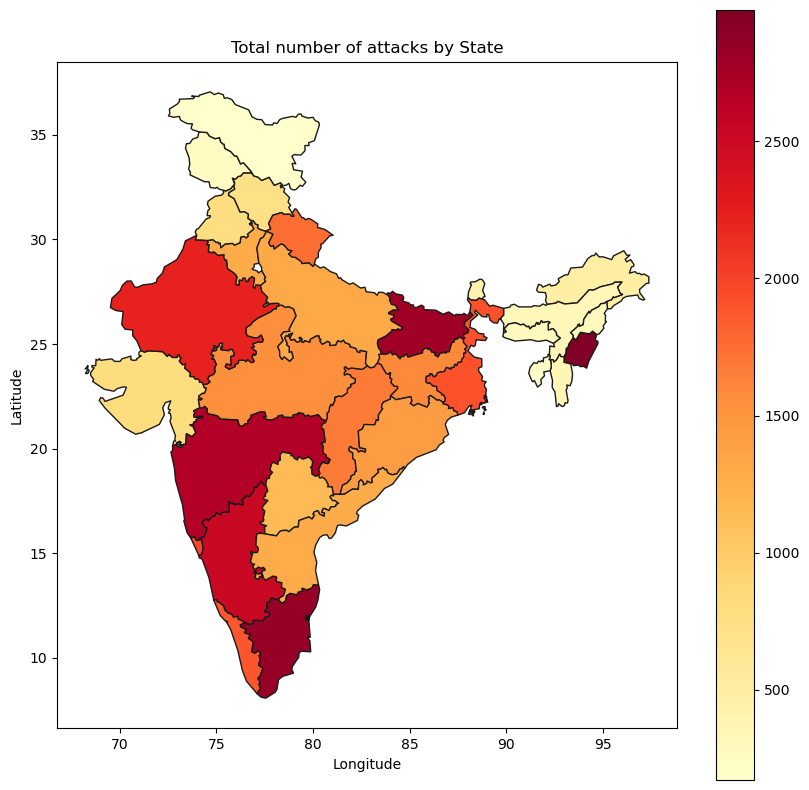

In [33]:
# Visualize the count of attacks on the India Map.

attacked_state = df_if.groupby('location_state')[['attack_type_ddos', 'attack_type_intrusion', 'attack_type_malware']].sum()
attacked_state['total_attacks'] = attacked_state.sum(axis=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_data = india_map.merge(attacked_state, left_on='st_nm', right_on='location_state')
merged_data.plot(column='total_attacks', ax=ax, legend=True, cmap='YlOrRd', linewidths=1, edgecolor='0.1')

# Customize the plot (optional)
ax.set_title('Total number of attacks by State')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

<div class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput" data-mime-type="text/markdown">
<h3 id="Now-we-perform-a-deep-dive-into-one-of-the-most-attacked-state-in-our-dataset---Manipur">Now we perform a deep-dive into one of the most attacked state in our dataset - Manipur<a class="anchor-link" href="#Now-we-perform-a-deep-dive-into-one-of-the-most-attacked-state-in-our-dataset---Manipur">¶</a></h3><p>Drilling down based on two parameters:</p>
<ol>
<li> Protocol</li>
<li> Attack Type</li>
<li> Network Segment</li>
</ol>
</div>

In [35]:
# Performing Temporary transformations to get count of attack types, protocol and network segment.

df_if['attack_type'] = df_if.attack_type_ddos.apply(lambda x: "DDoS" if x == 1 else '') + \
                    df_if.attack_type_intrusion.apply(lambda x: "Intrusion" if x == 1 else '') + \
                    df_if.attack_type_malware.apply(lambda x: "Malware" if x == 1 else '')

df_if['network_segment'] = df_if.network_segment_a.apply(lambda x: "Segment A" if x == 1 else '') + \
                    df_if.network_segment_b.apply(lambda x: "Segment B" if x == 1 else '') + \
                    df_if.network_segment_c.apply(lambda x: "Segment C" if x == 1 else '')


In [36]:
# reperesents all the attacks made on the state of Manipur.

manipur_data = df_if[df_if.location_state == 'Manipur']
# Performing groupby to get breakdown based on Device types

print("Manipur total attacks broken into Device Types")
manipur_data.groupby('device_type')['date'].agg(['size']).reset_index().rename(columns={'size': 'Count', 'device_type':'Device Type' })


Manipur total attacks broken into Device Types


,Device Type,Count
0,Laptop/Desktop,2322
1,Mobile/Tablet,656


In [37]:
# Level 2 drilling down based on Attack types
manipur_ltop_dtop = manipur_data[manipur_data.device_type == 'Laptop/Desktop']

print("Manipur Laptop/Desktop broken into Attack Types")
manipur_ltop_dtop.groupby('attack_type')['date'].agg(['size']).reset_index().rename(columns={'attack_type': 'Attack Type', 'size':'Count'})


Manipur Laptop/Desktop broken into Attack Types


,Attack Type,Count
0,DDoS,790
1,Intrusion,764
2,Malware,768


In [38]:
manipur_mob_tab = manipur_data[manipur_data.device_type == 'Mobile/Tablet']

print("Manipur Mobile/Tablet broken into Attack Types")
manipur_mob_tab.groupby('attack_type')['date'].agg(['size']).reset_index().rename(columns={'attack_type': 'Attack Type', 'size':'Count'})


Manipur Mobile/Tablet broken into Attack Types


,Attack Type,Count
0,DDoS,221
1,Intrusion,221
2,Malware,214


In [39]:
# Level 3 breakdown based on Network Segments
manipur_mob_tab_ddos = manipur_mob_tab[manipur_mob_tab.attack_type == 'DDoS']
manipur_mob_tab_malware = manipur_mob_tab[manipur_mob_tab.attack_type == 'Malware']
manipur_mob_tab_intrusion = manipur_mob_tab[manipur_mob_tab.attack_type == 'Intrusion']

manipur_ltop_dtop_ddos = manipur_ltop_dtop[manipur_ltop_dtop.attack_type == 'DDoS']
manipur_ltop_dtop_malware = manipur_ltop_dtop[manipur_ltop_dtop.attack_type == 'Malware']
manipur_ltop_dtop_intrusion = manipur_ltop_dtop[manipur_ltop_dtop.attack_type == 'Intrusion']


manipur_ltop_dtop_ddos.groupby("network_segment")['date'].agg(['size']).reset_index().rename(columns={'network_segment':'Network Segment', 'size':'Count'})
manipur_ltop_dtop_malware.groupby("network_segment")['date'].agg(['size']).reset_index().rename(columns={'network_segment':'Network Segment', 'size':'Count'})
manipur_ltop_dtop_intrusion.groupby("network_segment")['date'].agg(['size']).reset_index().rename(columns={'network_segment':'Network Segment', 'size':'Count'})

manipur_mob_tab_ddos.groupby("network_segment")['date'].agg(['size']).reset_index().rename(columns={'network_segment':'Network Segment', 'size':'Count'})
manipur_mob_tab_malware.groupby("network_segment")['date'].agg(['size']).reset_index().rename(columns={'network_segment':'Network Segment', 'size':'Count'})
manipur_mob_tab_intrusion.groupby("network_segment")['date'].agg(['size']).reset_index().rename(columns={'network_segment':'Network Segment', 'size':'Count'})


,Network Segment,Count
0,Segment A,270
1,Segment B,264
2,Segment C,256


,Network Segment,Count
0,Segment A,275
1,Segment B,229
2,Segment C,264


,Network Segment,Count
0,Segment A,258
1,Segment B,263
2,Segment C,243


,Network Segment,Count
0,Segment A,76
1,Segment B,73
2,Segment C,72


,Network Segment,Count
0,Segment A,67
1,Segment B,70
2,Segment C,77


,Network Segment,Count
0,Segment A,68
1,Segment B,71
2,Segment C,82


<div class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput" data-mime-type="text/markdown">
<p>We address the question and provide Managerial Insight - how many attacks were made and what devices were impacted - by representing the count of attacks in the following format and improve the readability:</p>
<p>Here we find that the Network Segment A (representing Government and Public Sector customers) faced a high amount of DDoS (Distributed Denial of Service) attacks on their Laptops compared to their Mobile device. The attacks in general are large in number for the Government and Public sector customers. 

### Managerial Insight: 
Therefore, as a SecOps leader, we must work on a strategy to bolster the security posture of these customer in the order of priority followed by Commercial Enterprise (Segment B) customers and finally work on providing a secure service to the Commercial Individual Customers (Segment C)</p>
<img alt="No description has been provided for this image" src="finding1.png">
</div>

## 2.1 Non-Trivial Finding

<b>Question we are trying to answer:</b> <br>
Can we predict the type of protocol being used in the traffic with anomalous behavior and correlate that with the most prevalent attack? This find includes Machine Learning

In [42]:
# Creating a single column for Y class
finding2 = df[df.anomaly_scores > 50].copy()
finding2.protocol_icmp.replace({1:'ICMP', 0:''}, inplace=True)
finding2.protocol_tcp.replace({1:'TCP', 0:''}, inplace=True)
finding2.protocol_udp.replace({1:'UDP', 0:''}, inplace=True)

finding2['protocol'] = finding2.protocol_icmp + finding2.protocol_tcp + finding2.protocol_udp

In [43]:
# Getting average, maximum and count of anomaly scores based on protocals
finding2[finding2.anomaly_scores > 50].groupby('protocol')['anomaly_scores'].agg(["mean", "max", "count"]).sort_values(by="max", ascending=False)

,mean,max,count
protocol,,,
ICMP,74.822215,100.00,9156
TCP,74.999657,99.99,5775
UDP,75.048575,99.98,5199


Training ML model using RandomForestClassifier -
- Creating x and y classes
- Splitting test and training dataset using "train_test_split"
- Checking the Accuracy of the trained model
- Plotting confusion matrix using heatmap (seaborn module)

RandomForestClassifier(random_state=42)


Model Accuracy: 0.3756

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.49      0.48      1861
           1       0.30      0.30      0.30      1144
           2       0.27      0.26      0.26      1021

    accuracy                           0.38      4026
   macro avg       0.35      0.35      0.35      4026
weighted avg       0.37      0.38      0.37      4026



<Axes: >

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.722222222222214, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix')

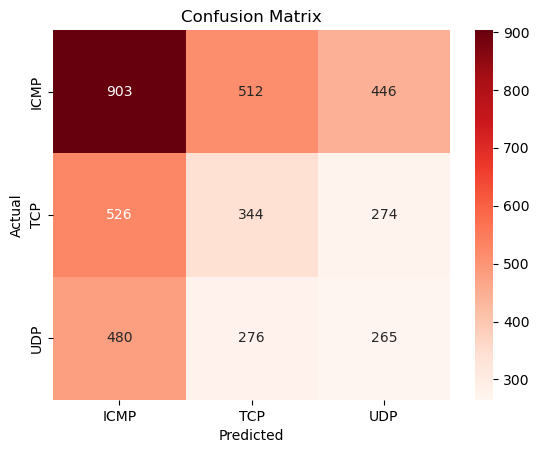

In [45]:
# Select relevant features and target
X = finding2[['anomaly_scores', 'attack_type_ddos', 'attack_type_malware', 'attack_type_intrusion']]
y = finding2['protocol']

# Encode target variable
y = y.astype('category').cat.codes  # Convert categorical labels to numerical codes

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

# Save the trained model
# joblib.dump(model, 'random_forest_protocol_model.pkl')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(finding2['protocol']), yticklabels=np.unique(finding2['protocol']))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Here, we trained the dataset containing anomaly score (measure of anomalous behavior) and predicted the protocol which was used with an <b>Accuracy of 37.56%</b>.<br><br>
Using this prediction and the insight in Finding 1, a correlation can be derived that "ICMP" protocol was most prevalent in the anomalous traffic which were captured during the "DDoS" attacks.<br>
### <b>Managerial Insight:</b>
From the outcomes of findings 1 and 2, we are arrive at an understanding that a large number of "DDoS" attacks were made using "ICMP" protocol. The learning for SecOps team is to tighten up the security rules to rate traffic (especially with ICMP protocol) to the Acme’s datacenter and also monitor suspicious traffic patterns (for example: large traffic spikes during off seasons).



## 3 Unexpected Finding

<div class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput" data-mime-type="text/markdown">
<p>Question we want to answer: how can we bolster the security in our systems?</p>
<p>Our expectations:</p>
<ol>
    <li>We would see a steady decline in ignored actions and a steady increase in blocked actions over a period of time, indicating that security measures were improved and helped prevent attacks.</li>
<li>We would see an unstable number of attacks. Realistically, we wouldn't see 10,000 attacks every month.</li>
<li>We would see an increase in logged actions, which would result in an increase to blocked actions over a period of time. This would suggest that the security engineers learned from the logged events and improved on their preventive measures for suspicious activities.</li>
    <ol>
</div>

In [48]:
# Dataframe df3 represents the data which we need work with for finding 3.

df3 = df[df.date < pd.to_datetime('2023-10-01').date()].copy()

In [49]:
# Bins that divide entries based on date
bins = pd.to_datetime(['2020-01-01', '2020-04-01', '2020-07-01', '2020-10-01', '2021-01-01', '2021-04-01',\
                      '2021-07-01', '2021-10-01', '2022-01-01', '2022-04-01', '2022-07-01', '2022-10-01',\
                     '2023-01-01', '2023-04-01', '2023-07-01', '2023-10-01'])

# Labels
labels = ['Q1 2020', 'Q2 2020', 'Q3 2020', 'Q4 2020', 'Q1 2021', 'Q2 2021', 'Q3 2021', 'Q4 2021', 'Q1 2022',\
         'Q2 2022', 'Q3 2022', 'Q4 2022', 'Q1 2023', 'Q2 2023', 'Q3 2023']

# Create a new column where the date will correspond with the quarter label
df3['quarter'] = pd.cut(df3['date'], bins=bins, labels=labels, right=False)

In [50]:
# Group actions taken by quarter column
count_df = df3.groupby('quarter').agg({'action_taken_ignored': 'sum', \
                                       'action_taken_logged': 'sum', 'action_taken_blocked': 'sum'}).reset_index()


<Figure size 1500x1000 with 0 Axes>

<BarContainer object of 15 artists>

<BarContainer object of 15 artists>

<BarContainer object of 15 artists>

Text(0.5, 0, 'Year (Split into Quarters)')

([<matplotlib.axis.XTick at 0x337d13b00>,
 [Text(0.25, 0, 'Q1 2020'),
  Text(1.25, 0, 'Q2 2020'),
  Text(2.25, 0, 'Q3 2020'),
  Text(3.25, 0, 'Q4 2020'),
  Text(4.25, 0, 'Q1 2021'),
  Text(5.25, 0, 'Q2 2021'),
  Text(6.25, 0, 'Q3 2021'),
  Text(7.25, 0, 'Q4 2021'),
  Text(8.25, 0, 'Q1 2022'),
  Text(9.25, 0, 'Q2 2022'),
  Text(10.25, 0, 'Q3 2022'),
  Text(11.25, 0, 'Q4 2022'),
  Text(12.25, 0, 'Q1 2023'),
  Text(13.25, 0, 'Q2 2023'),
  Text(14.25, 0, 'Q3 2023')])

Text(0, 0.5, 'Total Actions per Quarter')

Text(0.5, 1.0, 'Ignored, Logged and Blocked Actions over Time')

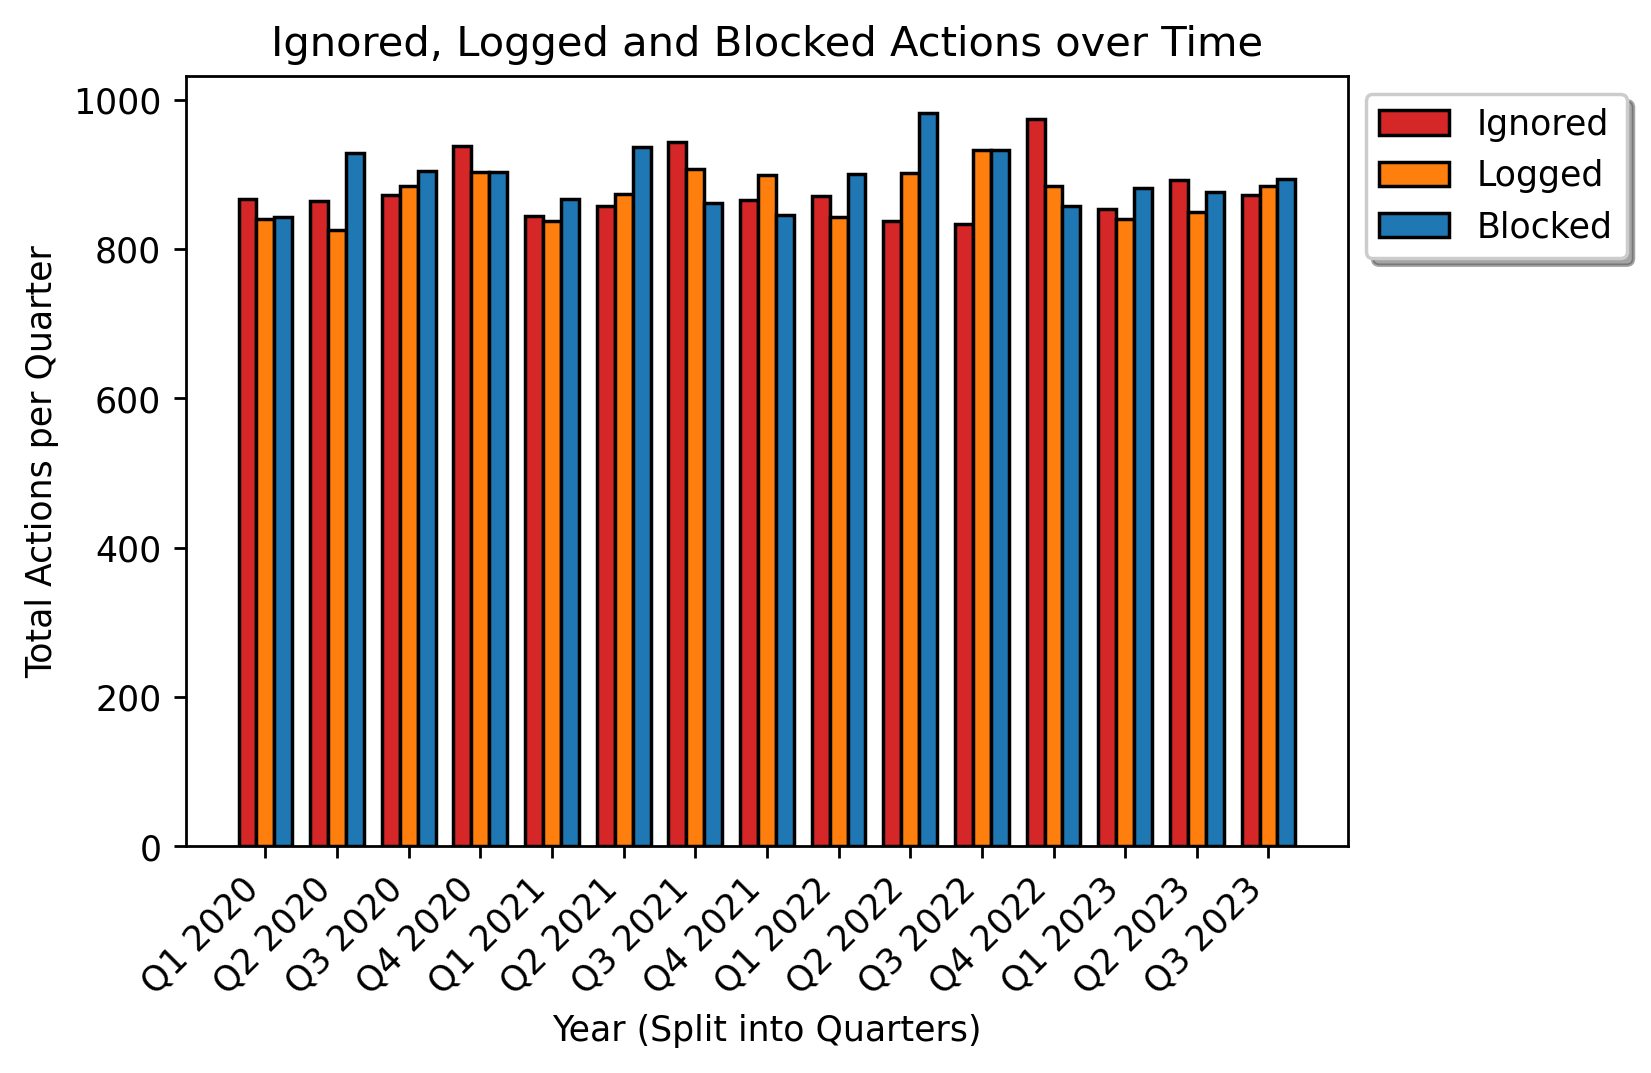

In [51]:
# Create the bars
r1 = np.arange(len(count_df['quarter']))
r2 = r1 + 0.25
r3 = r2 + 0.25

# Make image larger
plt.figure(figsize=(6,4), dpi=250)

# Edit bars
plt.bar(r1, count_df['action_taken_ignored'], color='tab:red', width=0.25, edgecolor='black', label='Ignored')
plt.bar(r2, count_df['action_taken_logged'], color='tab:orange', width=0.25, edgecolor='black', label='Logged')
plt.bar(r3, count_df['action_taken_blocked'], color='tab:blue', width=0.25, edgecolor='black', label='Blocked')

# Add labels and titles to the axis
plt.xlabel('Year (Split into Quarters)')
plt.xticks([r + 0.25 for r in range(len(count_df['quarter']))], count_df['quarter'], rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1, 1.00), fancybox=True, shadow=True)
plt.ylabel('Total Actions per Quarter')
plt.title('Ignored, Logged and Blocked Actions over Time')

plt.show()

<div class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput" data-mime-type="text/markdown">
<p>Instead, we found:</p>
<ol>
    <li>Logged actions have consistent peaks and valleys during the first and second half of the year. For example, in 2022, we can see a peak in Q1 and Q2, and a valley in Q3 and Q4.</li>
<li>When there was an increase in ignored actions, it led to a decrease in logged and blocked actions in the same and next quarter. It can be seen in Q4 2020 and Q3 2021.</li>
<li>Compared to the rest of the quarters, the actions taken in Q1 are consistently lower compared to the rest of the quarters. We hypothesized that it was because companies don't typically have major events in the first quarter as many holidays are clustered around those months, so that could be why there is a lower action amount.</li>
</ol>
</div>

### Managerial Insight and outcome of finding 3 is:
<ol>
    <li>Perform root cause analysis for the Ignored and Logged actions in a priority order of Network Segments (customer base) and increase security process, tools and techniques based on the root cause analysis.</li>
</ol>